In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('TSLA.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [7]:
#Moving average for 100 days

In [8]:
moving_average100 = df.Close.rolling(100).mean()

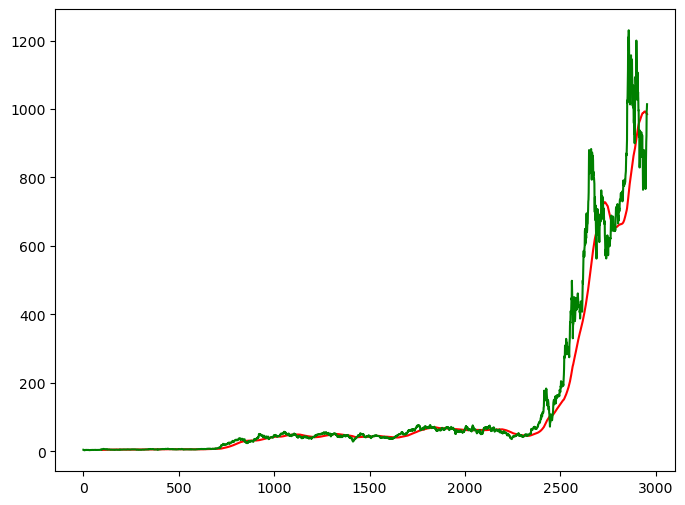

In [9]:
plt.figure(figsize=(8,6))
plt.plot(moving_average100, 'r')
plt.plot(df.Close, 'g')
plt.show()

In [10]:
#Moving average for 200 days

In [11]:
moving_average200 = df.Close.rolling(200).mean()

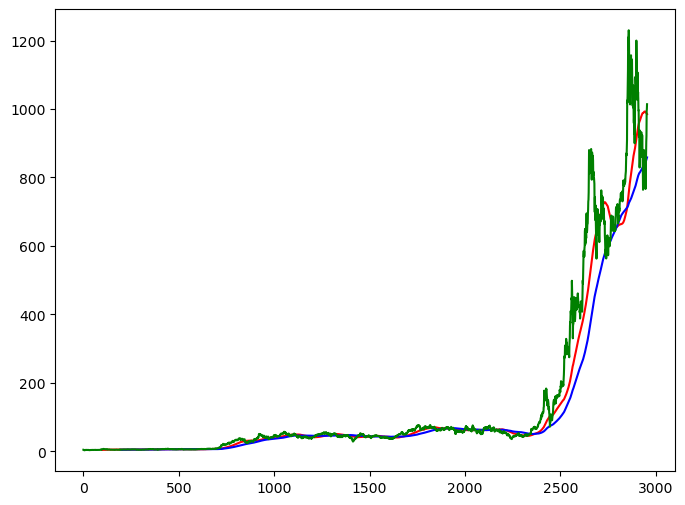

In [12]:
plt.figure(figsize=(8,6))
plt.plot(moving_average100, 'r')
plt.plot(moving_average200, 'b')
plt.plot(df.Close, 'g')
plt.show()

In [13]:
#Drop any null values

In [14]:
df = df.dropna()

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [16]:
#Splitting Data into testing and training(80% Training 20% Testing)

In [17]:
df_train = pd.DataFrame(df.Close[0: int(len(df)*0.80)])
df_test = pd.DataFrame(df.Close[int(len(df)*0.80): len(df)])

In [18]:
df_train.shape[0]

2364

In [19]:
df_test.shape[0]

592

In [20]:
#Scale the Data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [22]:
df_train_s = scaler.fit_transform(df_train.values.reshape(-1,1))


In [23]:
df_train_s

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.89466414],
       [0.90343991],
       [0.91107798]])

In [24]:
x_train = []
y_train = []
for x in range(100, df_train_s.shape[0]):
    x_train.append(df_train_s[x-100:x])
    y_train.append(df_train_s[x,0])

In [25]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
#Build Neural Netwrok Model

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #Preduction of Next Closing Value

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
model.fit(x_train,y_train, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
71/71 [==============================] - 23s 201ms/step - loss: 0.0234
Epoch 2/50
71/71 [==============================] - 10s 144ms/step - loss: 0.0074
Epoch 3/50
71/71 [==============================] - 11s 149ms/step - loss: 0.0077
Epoch 4/50
71/71 [==============================] - 10s 136ms/step - loss: 0.0066
Epoch 5/50
71/71 [==============================] - 9s 124ms/step - loss: 0.0066
Epoch 6/50
71/71 [==============================] - 10s 141ms/step - loss: 0.0059
Epoch 7/50
71/71 [==============================] - 9s 132ms/step - loss: 0.0060
Epoch 8/50
71/71 [==============================] - 10s 143ms/step - loss: 0.0053
Epoch 9/50
71/71 [==============================] - 9s 134ms/step - loss: 0.0054
Epoch 10/50
71/71 [==============================] - 9s 125ms/step - loss: 0.0050
Epoch 11/50
71/71 [==============================] - 10s 145ms/step - loss: 0.0049
Epoch 12/50
71/71 [==============================] - 14s 192ms/step - loss: 0.0047
Epoch 13/50
71/71

In [31]:
#Model Summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
#Test the Model

In [34]:
past_100days = df_train.tail(100)

In [35]:
df_test = pd.concat([past_100days, df_test])

In [36]:
df_test_s = scaler.fit_transform(df_test)

In [37]:
x_test = []
y_test = []
for x in range(100, df_test_s.shape[0]):
    x_test.append(df_test_s[x-100:x])
    y_test.append(df_test_s[x,0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [39]:
predicted_prices = model.predict(x_test)

19/19 [==============================] - 5s 74ms/step


In [40]:
predicted_prices

array([[0.0147723 ],
       [0.01520604],
       [0.01559243],
       [0.01589981],
       [0.01612714],
       [0.01605809],
       [0.01569799],
       [0.01510623],
       [0.01443976],
       [0.01382744],
       [0.01339772],
       [0.01320004],
       [0.0131647 ],
       [0.01318157],
       [0.01324579],
       [0.01339126],
       [0.01370233],
       [0.01419562],
       [0.01486075],
       [0.01558638],
       [0.01649451],
       [0.01752856],
       [0.0186868 ],
       [0.01998216],
       [0.02131173],
       [0.02266556],
       [0.02401808],
       [0.02532476],
       [0.02648178],
       [0.02723113],
       [0.02754998],
       [0.02768514],
       [0.0279474 ],
       [0.02851051],
       [0.02950102],
       [0.03103775],
       [0.0327951 ],
       [0.03436965],
       [0.0360541 ],
       [0.03805074],
       [0.03997749],
       [0.04143965],
       [0.04227775],
       [0.04298222],
       [0.04406634],
       [0.0455831 ],
       [0.04718956],
       [0.048

In [41]:
scale = 1/scaler.scale_

In [42]:
predicted_prices = predicted_prices*scale

In [43]:
y_test = y_test*scale

In [44]:
#Plot the Test Predictions

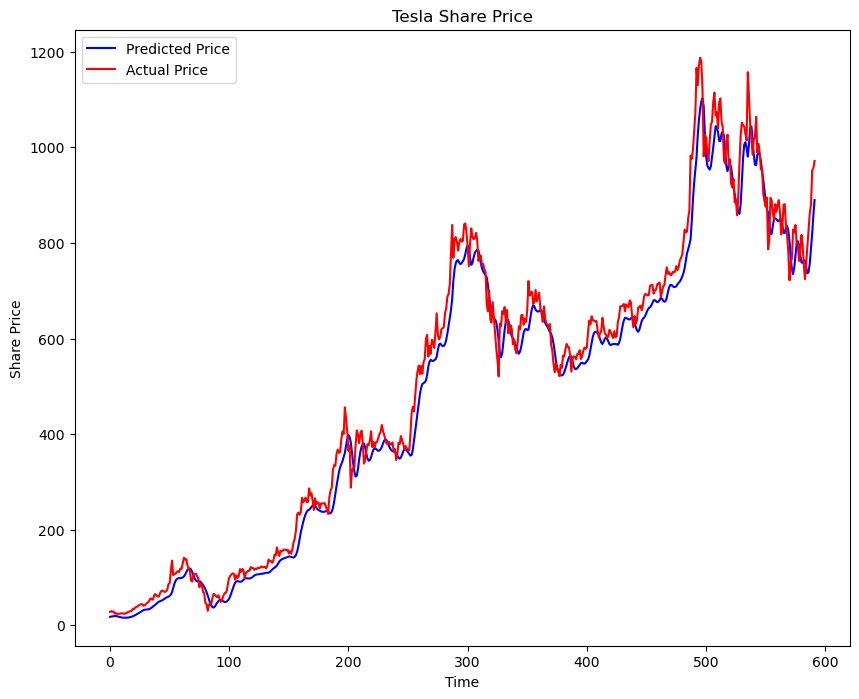

In [45]:
plt.figure(figsize=(10,8))
plt.plot(predicted_prices, 'b', label = 'Predicted Price')
plt.plot(y_test, 'r', label = 'Actual Price')
plt.title('Tesla Share Price')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
plt.show()    

In [46]:
model.save('Stock Predictions Model.hdf5')